<a href="https://colab.research.google.com/github/thanhlamnguyen/do_an_PTDL_Python/blob/main/Thong_ke_suy_dien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [30]:
df = pd.read_csv('Diet_R.csv')
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [31]:
df = df.rename(columns={"Person": "Người", "gender": "Giới tính", "Age": "Tuổi", "Height": "Chiều cao", "pre.weight": "Cân nặng ban đầu", "Diet": "phuong_phap_giam_can", "weight6weeks": "Cân nặng sau 6 tuần"})
df

,Người,Giới tính,Tuổi,Chiều cao,Cân nặng ban đầu,phuong_phap_giam_can,Cân nặng sau 6 tuần
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


Tính cân nặng bị hao hụt sau khi thông qua chế độ dinh dưỡng

In [33]:
df['can_nang_hao_hut'] = df['Cân nặng ban đầu'] - df['Cân nặng sau 6 tuần']
df_cân_nặng_hao_hụt = df[['phuong_phap_giam_can','can_nang_hao_hut']].copy()
df_cân_nặng_hao_hụt

,phuong_phap_giam_can,can_nang_hao_hut
0,2,0.0
1,2,0.0
2,1,3.8
3,1,6.0
4,1,0.7
...,...,...
73,3,2.8
74,3,4.1
75,3,5.3
76,3,9.2


SỰ KHÁC NHAU VỀ HIỆU QUẢ CỦA CÁC PHƯƠNG PHÁP GIẢM CÂN

Phát biểu giải thuyết thống kê 

H0: không có sự khác biệt về hiệu quả giảm cân giữa 3 phương pháp
H1: có ít nhất hai kiểu phương pháp khác nhau về hiệu quả giảm cân

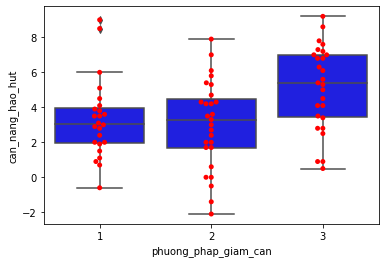

In [34]:
sns.boxplot(x='phuong_phap_giam_can',y='can_nang_hao_hut',data = df_cân_nặng_hao_hụt, color='blue')
sns.swarmplot(x='phuong_phap_giam_can',y='can_nang_hao_hut', data = df_cân_nặng_hao_hụt, color='red')
plt.show()


In [35]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [36]:
model = ols('can_nang_hao_hut ~ C(phuong_phap_giam_can)', data=df_cân_nặng_hao_hụt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [37]:
anova_table

,sum_sq,df,F,PR(>F)
C(phuong_phap_giam_can),71.093689,2.0,6.197447,0.003229
Residual,430.179259,75.0,NaN,NaN


In [38]:
def results(p, alpha=0.05):
    cols=['f_score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [39]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,6.197447,0.003229,Chấp nhận H1 với mức ý nghĩa 0.05


Kiểm tra hậu nghiệm

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [43]:
tukey = pairwise_tukeyhsd(endog=df_cân_nặng_hao_hụt['can_nang_hao_hut'],
                         groups=df_cân_nặng_hao_hụt['phuong_phap_giam_can'],
                         alpha=0.05)

In [44]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.2741,0.9,-1.8806,1.3325,False
1,3,1.8481,0.0201,0.2416,3.4547,True
2,3,2.1222,0.0048,0.5636,3.6808,True


Kiểm tra các điều kiện cho kiểm định Anova

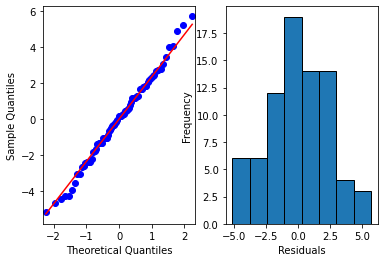

In [45]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [46]:
p_v = stats.shapiro(model.resid)[1]

Kiểm tra sự phân phối chuẩn

In [47]:
print('''Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn''')
if p_v > 0.05:
    print(f'Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu không tuân theo phân phối chuẩn (H1)')

Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn
Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn
